## Red Wine Quality Prediction Project

### Project Description

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, 
only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, 
wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced 
(e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. 
So it could be interesting to test feature selection methods.


### Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 



### Dataset Link-

https://github.com/dsrscientist/DSData/blob/master/winequality-red.csv


In [1]:
# Import necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


The dataset contains the detailes of wine in numerical data are present here.

In [3]:
# Checking The Dimension of th e dataset

df.shape

(1599, 12)

The dataset contains 1599 rows and 12 columns.out of which 1 is target veriable and remaining 11 are independent veriable.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As we can see there are no null values present in this dataset.
This gives the brief about the dataset which includes indexing type,columns type, no null values and memory usage.
There are two different types of data (int64 and float64) present in the dataset.

### Description of Dataset

In [5]:
# Statsical Summary

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Minimum value of citric acid is zero. Need check if it valid data or some kind of data error.

There is lot difference between 75 th percentile and max in residual sugar, free sulfer dioxide, total sulfer dioxide.

If we consider spread of data based on mean/std & right/left side skewed data based on 3rd quartile and max,
we can definitely say that outliers are present in data.

In [6]:
# Any missing values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
df.isnull().sum().sum()

0

In [8]:
# Mean feature values as per different quality grade

means = pd.pivot_table(data=df, index='quality',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean, 
                                                         'citric acid':np.mean,'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,
                                                         'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
quality,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,2.635000,0.570000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,2.694340,0.596415,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,2.528855,0.620969,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,2.477194,0.675329,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,2.720603,0.741256,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,2.577778,0.767778,0.423333


Based on mean value quality

1. Good quality (grade 7 & 8) of wine posses higher amount of alcohol, citric acid, fixed acidity, sulphates.

2. Good quality (grade 7 & 8) of wine posses lower amount of Chlorides, low pH value,volatile acidity.

3. Good quality (grade 7 & 8) of wine posses moderate amount of free sulfur dioxide in range of 14-16.

4. Density and residual sugar are not deciding factor in determining quality of wine.

#### Create Classification version of target variable

We will create two class for purpose of classification based on quality grade of red wine

class 1- Good quality red wine - if a quality grade of 7 or higher

class 2- Low quality red wine - if a quality grade less than 7

In [9]:
df['class'] =[1 if x >= 7 else 0 for x in df['quality']]

In [10]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

In [11]:
df1=df.drop(columns='quality')

In [12]:
# Mean feature values based on class

means = pd.pivot_table(data=df, index='class',aggfunc={'fixed acidity':np.mean, 'volatile acidity':np.mean,
                                                       'citric acid':np.mean, 
                                                     'residual sugar':np.mean,'chlorides':np.mean,
                                                     'free sulfur dioxide':np.mean,'density':np.mean,
                                                       'pH':np.mean,'sulphates':np.mean,'alcohol':np.mean})
means

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,volatile acidity
class,,,,,,,,,,
0,10.251037,0.089281,0.254407,0.996859,8.236831,16.172214,3.314616,2.512120,0.644754,0.547022
1,11.518049,0.075912,0.376498,0.996030,8.847005,13.981567,3.288802,2.708756,0.743456,0.405530


### Checking null value or missing data

<Axes: >

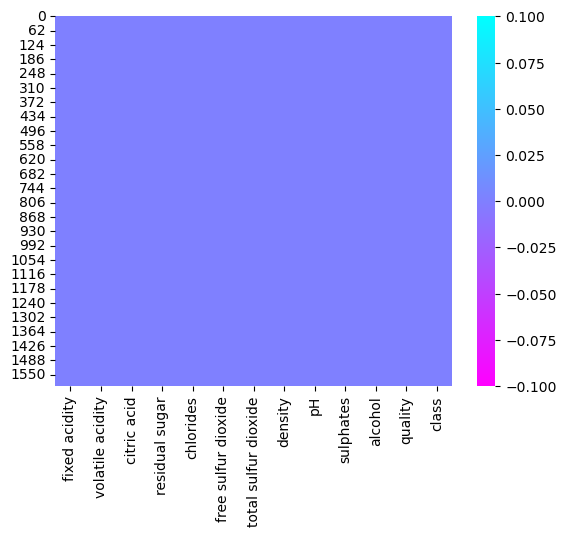

In [13]:
# let check the null values again

sns.heatmap(df.isnull(),cmap="cool_r")

In [14]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100

print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                      Missing Values  % Missing data
fixed acidity                      0             0.0
volatile acidity                   0             0.0
citric acid                        0             0.0
residual sugar                     0             0.0
chlorides                          0             0.0
free sulfur dioxide                0             0.0
total sulfur dioxide               0             0.0
density                            0             0.0
pH                                 0             0.0
sulphates                          0             0.0
alcohol                            0             0.0
quality                            0             0.0
class                              0             0.0


### Exploratory Data Analysis

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


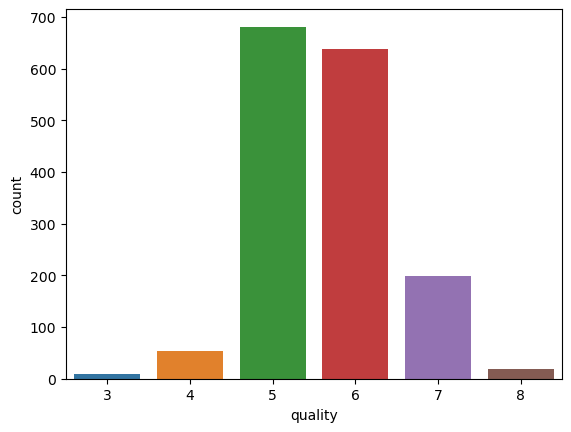

In [15]:
# visualize the number of quality

ax=sns.countplot(x='quality',data=df)
print(df['quality'].value_counts())

Majority of wine samples are of quality level 5 and 6.

This dataset we have only 217 wine sample with higher quality grade.

### Distribution of features :

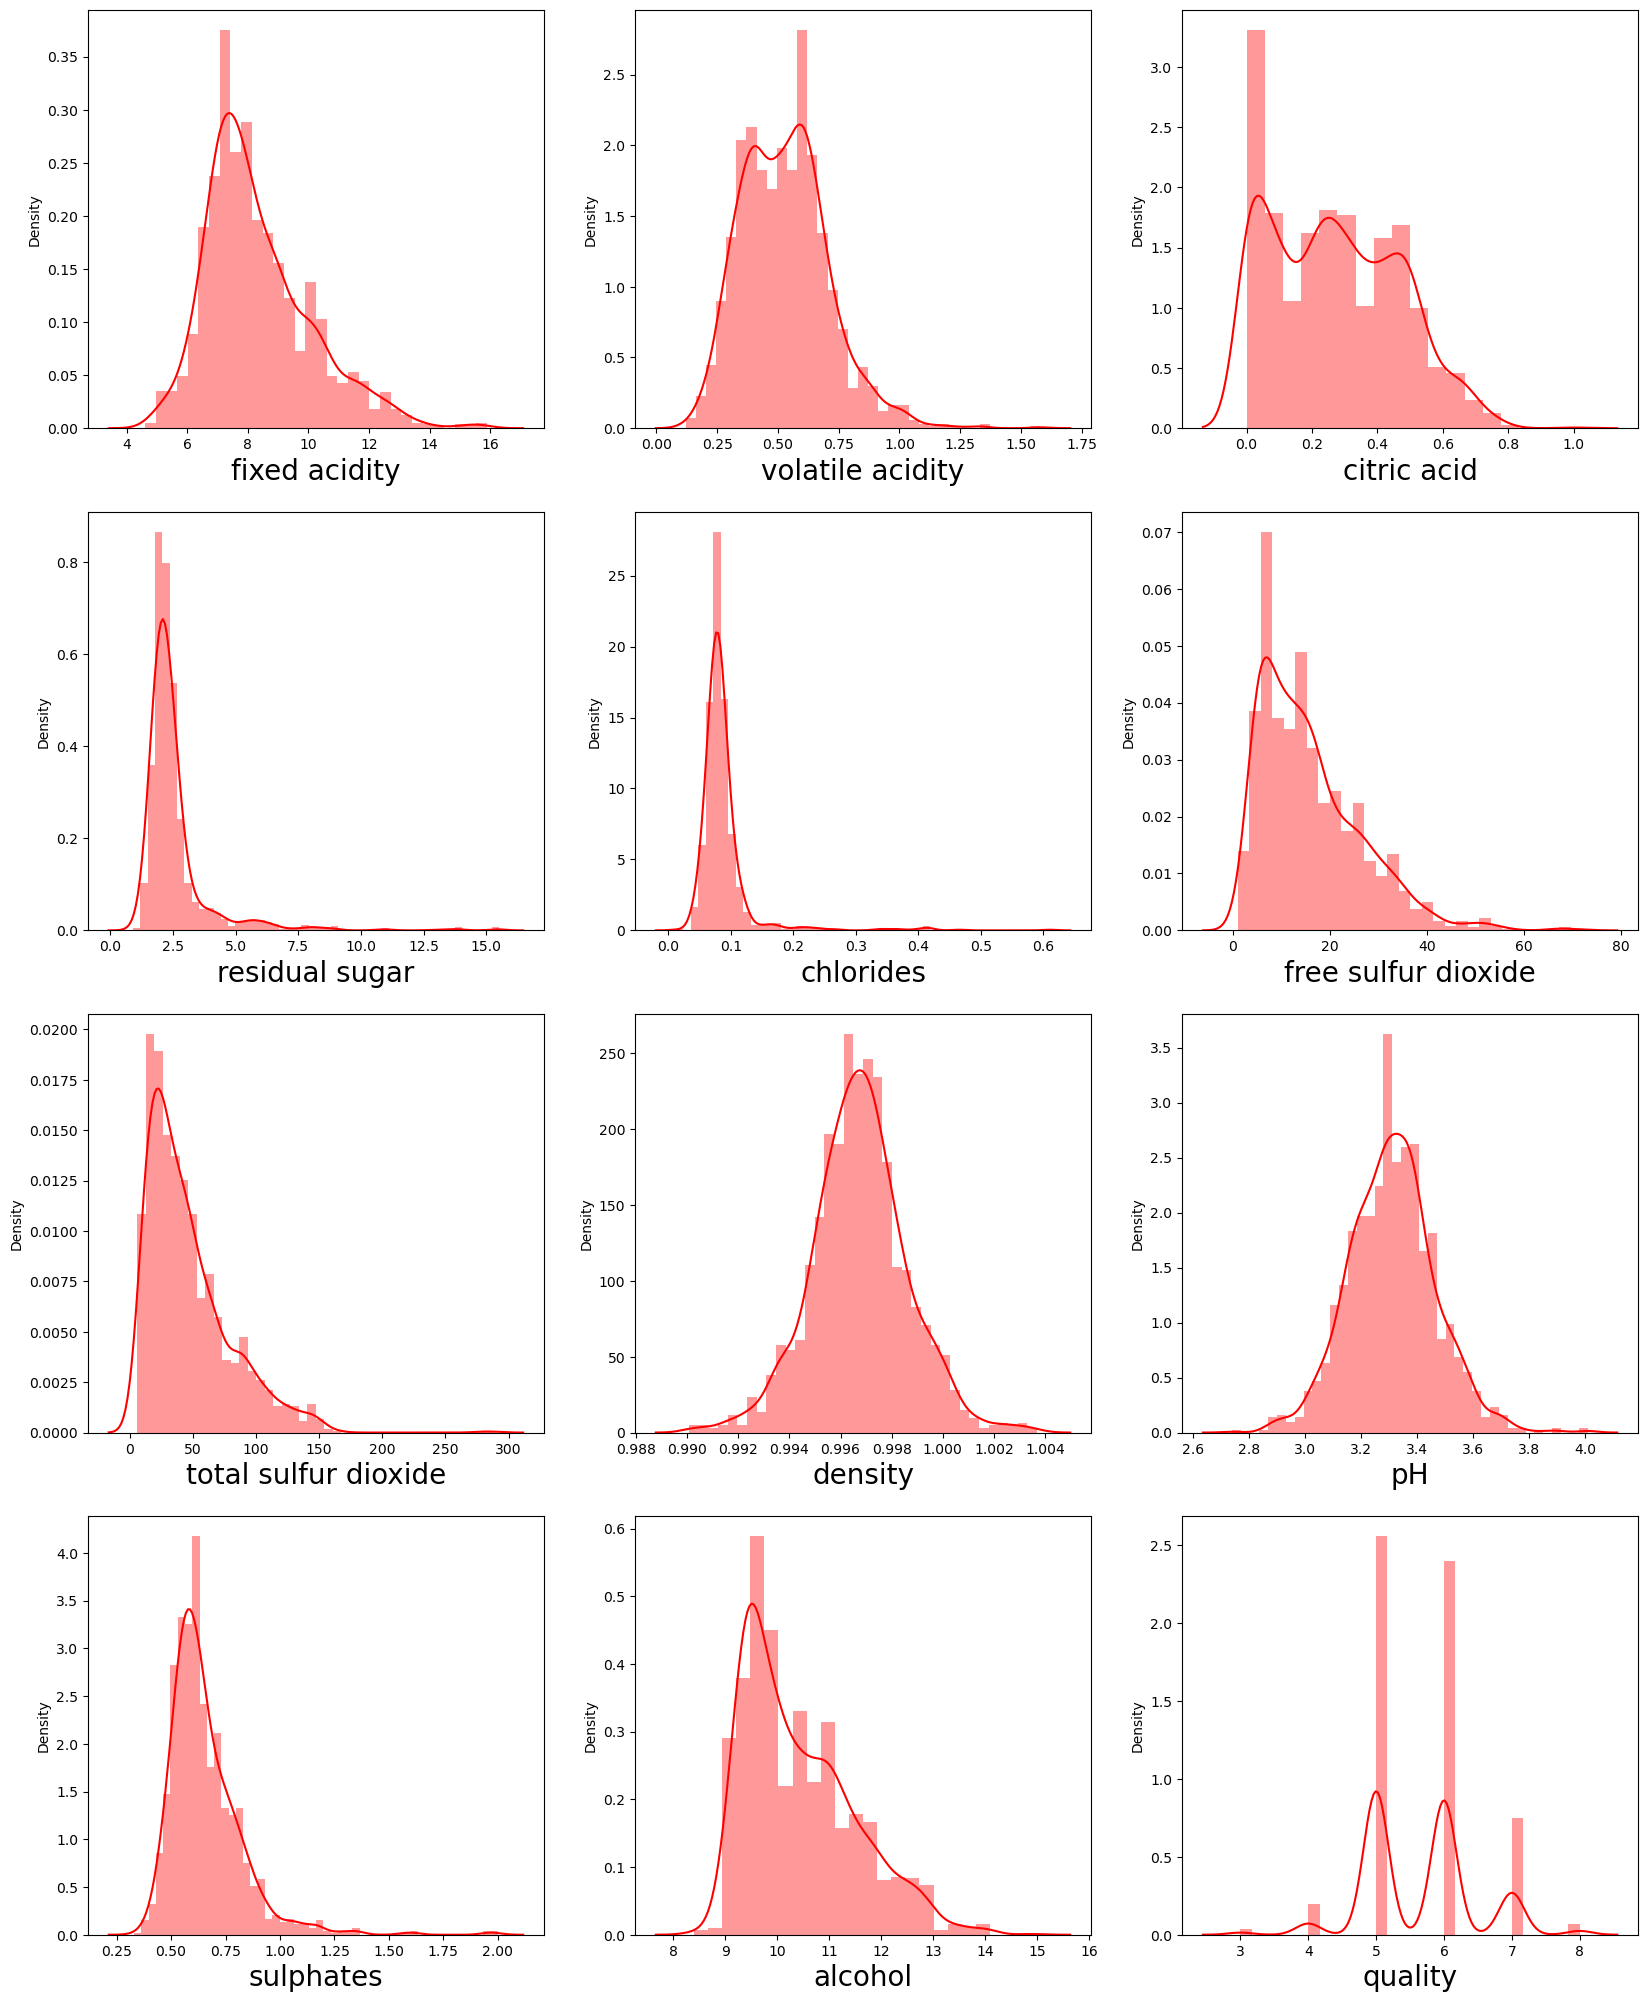

In [16]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column], color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the above distribution plot we can notice There is skewness in the data.

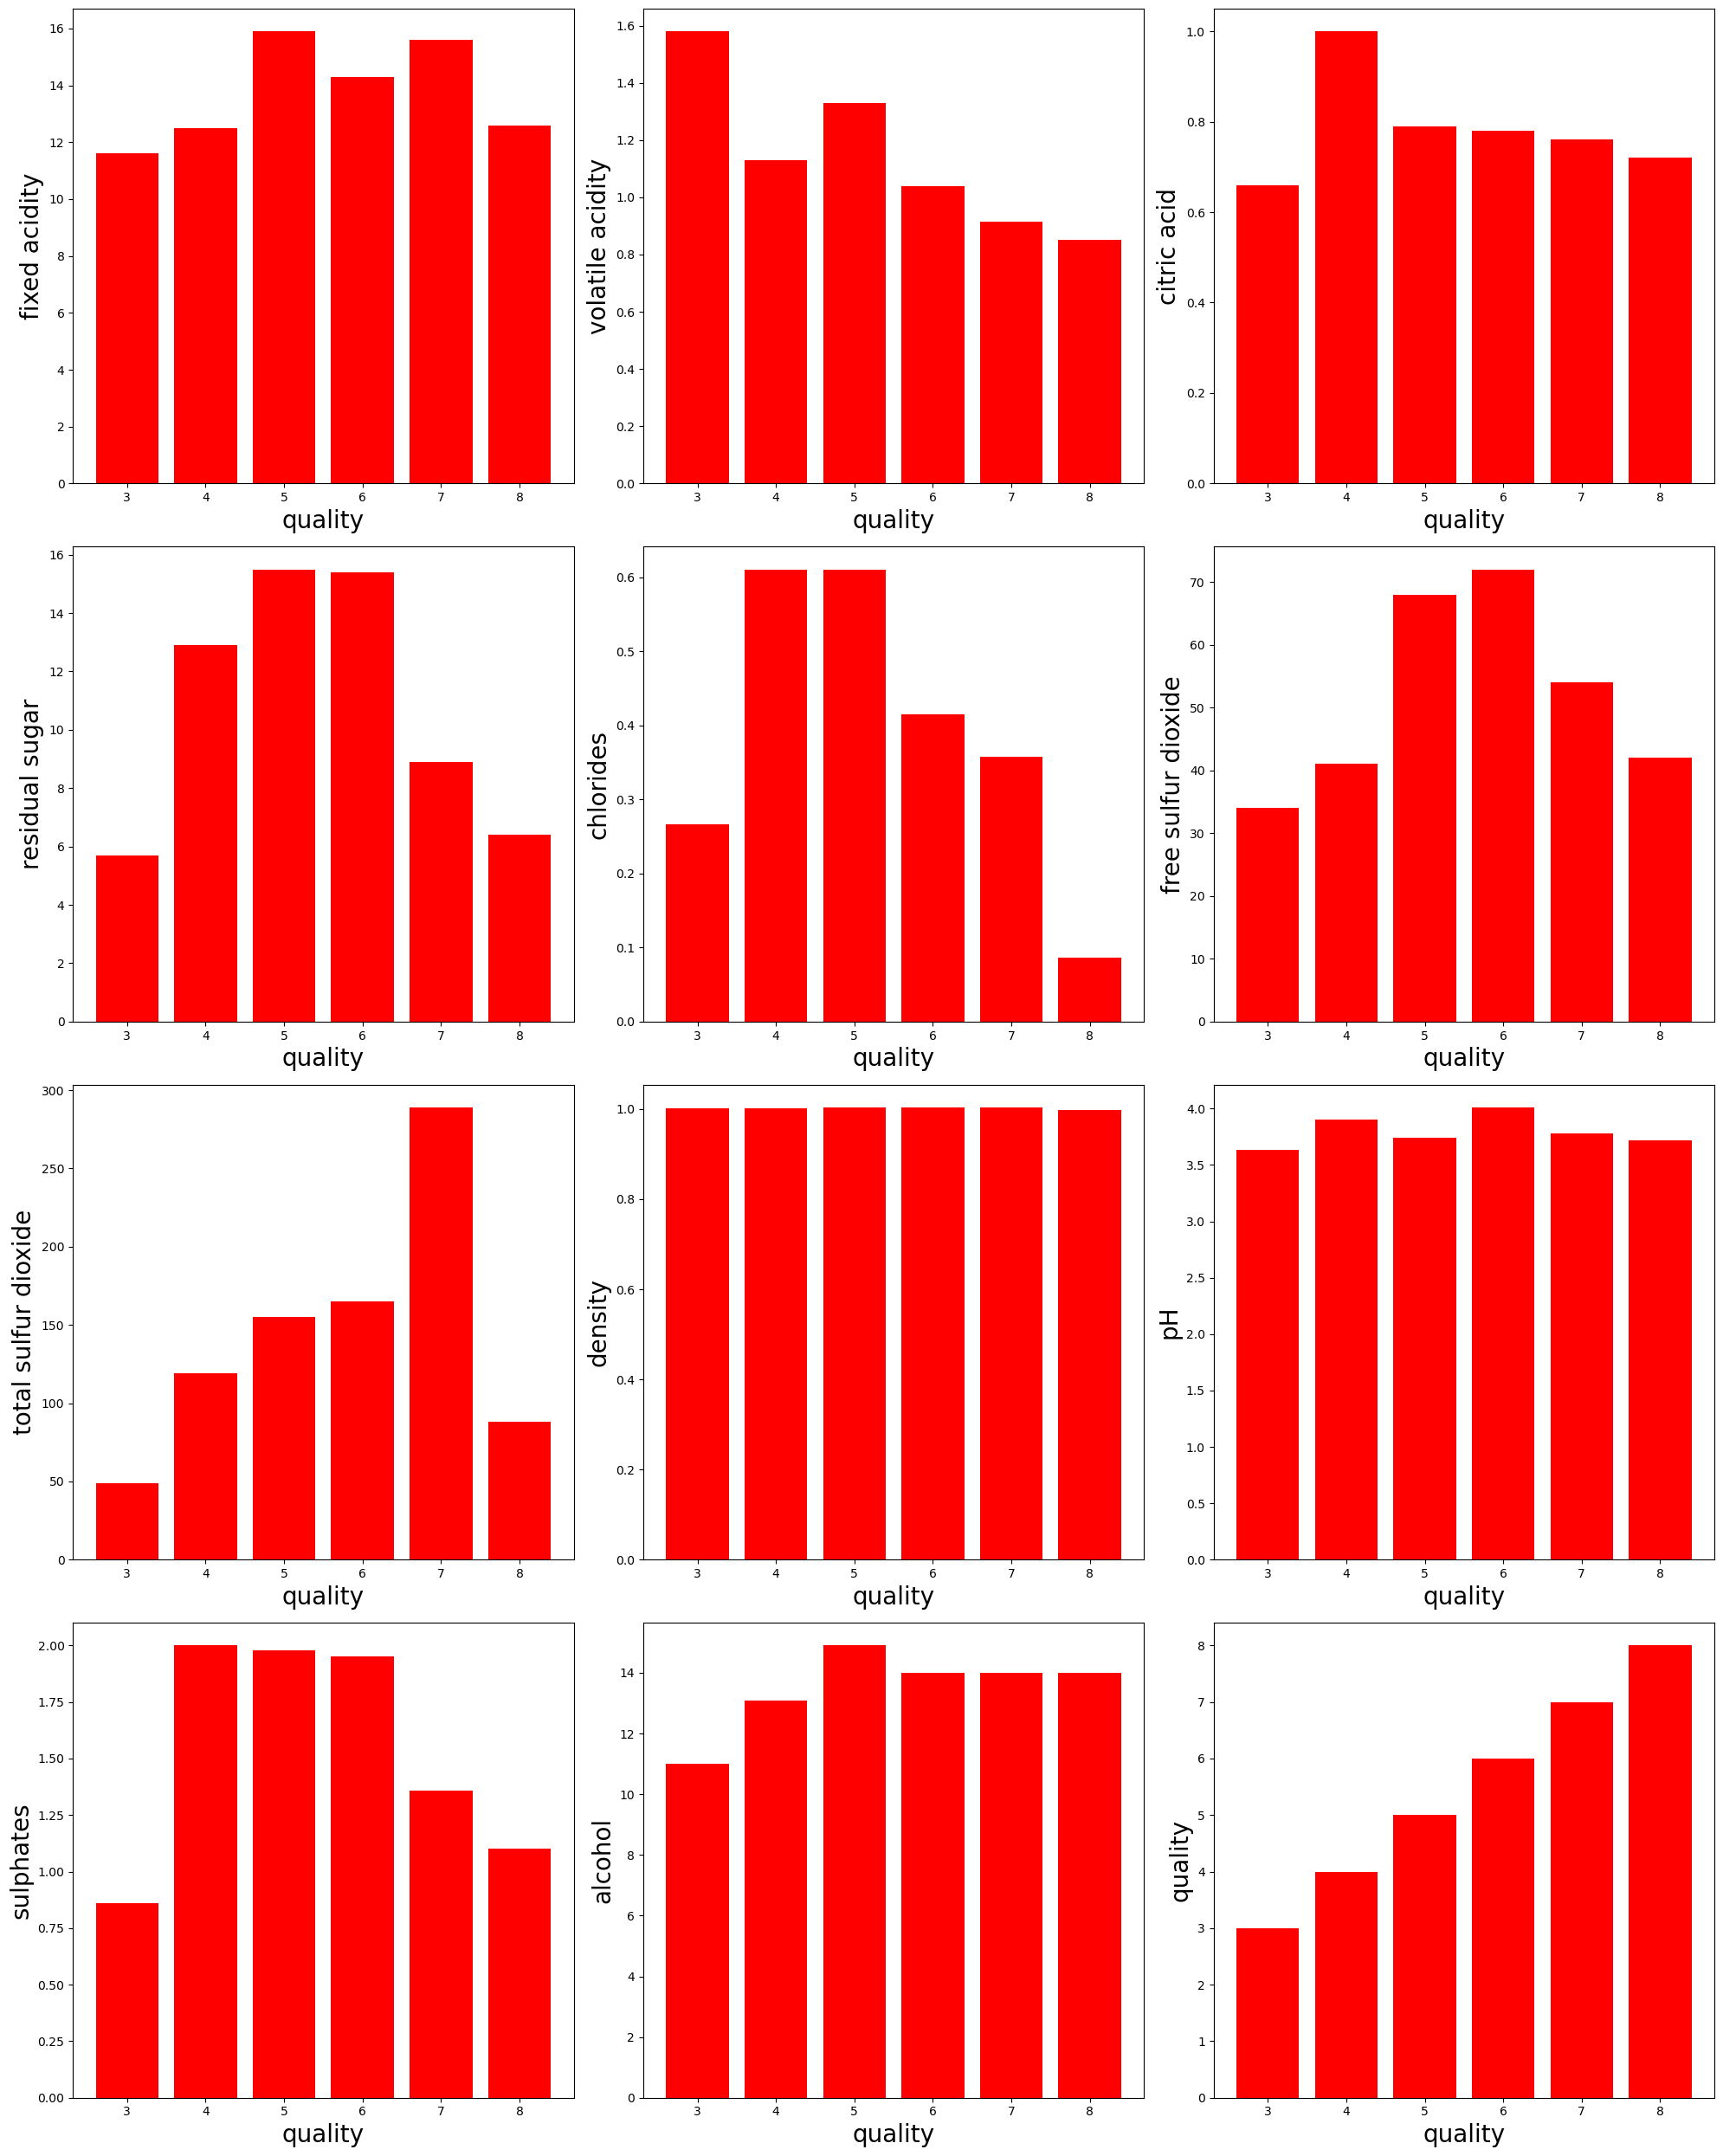

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        plt.bar(df['quality'], df[column], color='r') 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Based on quality

Good quality (grade 7 & 8) of wine posses higher amount of alcohol, fixed acidity.lower amount of low pH value,volatile acidity.
moderate amount of free sulfur dioxide in range of 14-16.

Density and residual sugar are not deciding factor in determining quality of wine.

Low grade quality of wine posses lower amount of total sulfer dioxide.

Higher volatile acid lower the quality of wine.

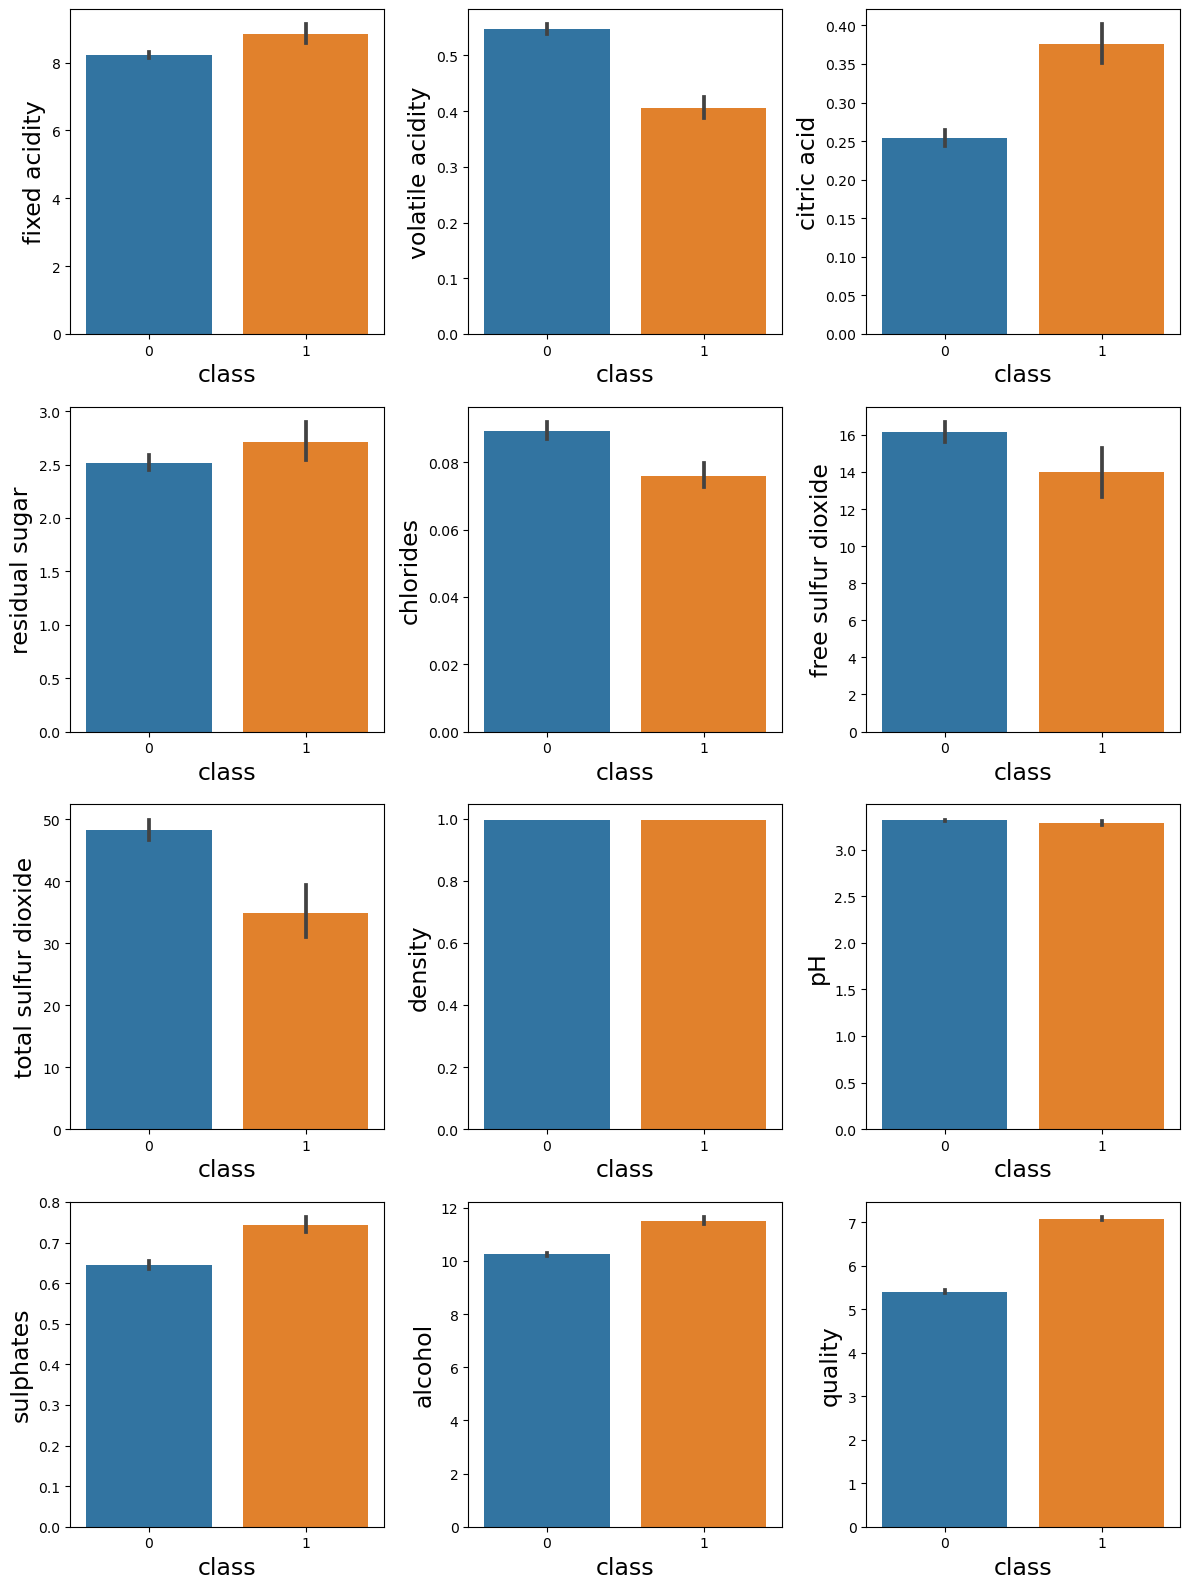

In [18]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(x="class", y=column, data=df) 
        plt.xlabel('class',fontsize=17)
        plt.ylabel(column, fontsize =17)
    plotnumber+=1
plt.tight_layout()
plt.show()

Quality of wine increase with increase in alcohol, sulpates, residual sugar, citric acid,fixed acidity.

Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity,free sulfur dioxide.

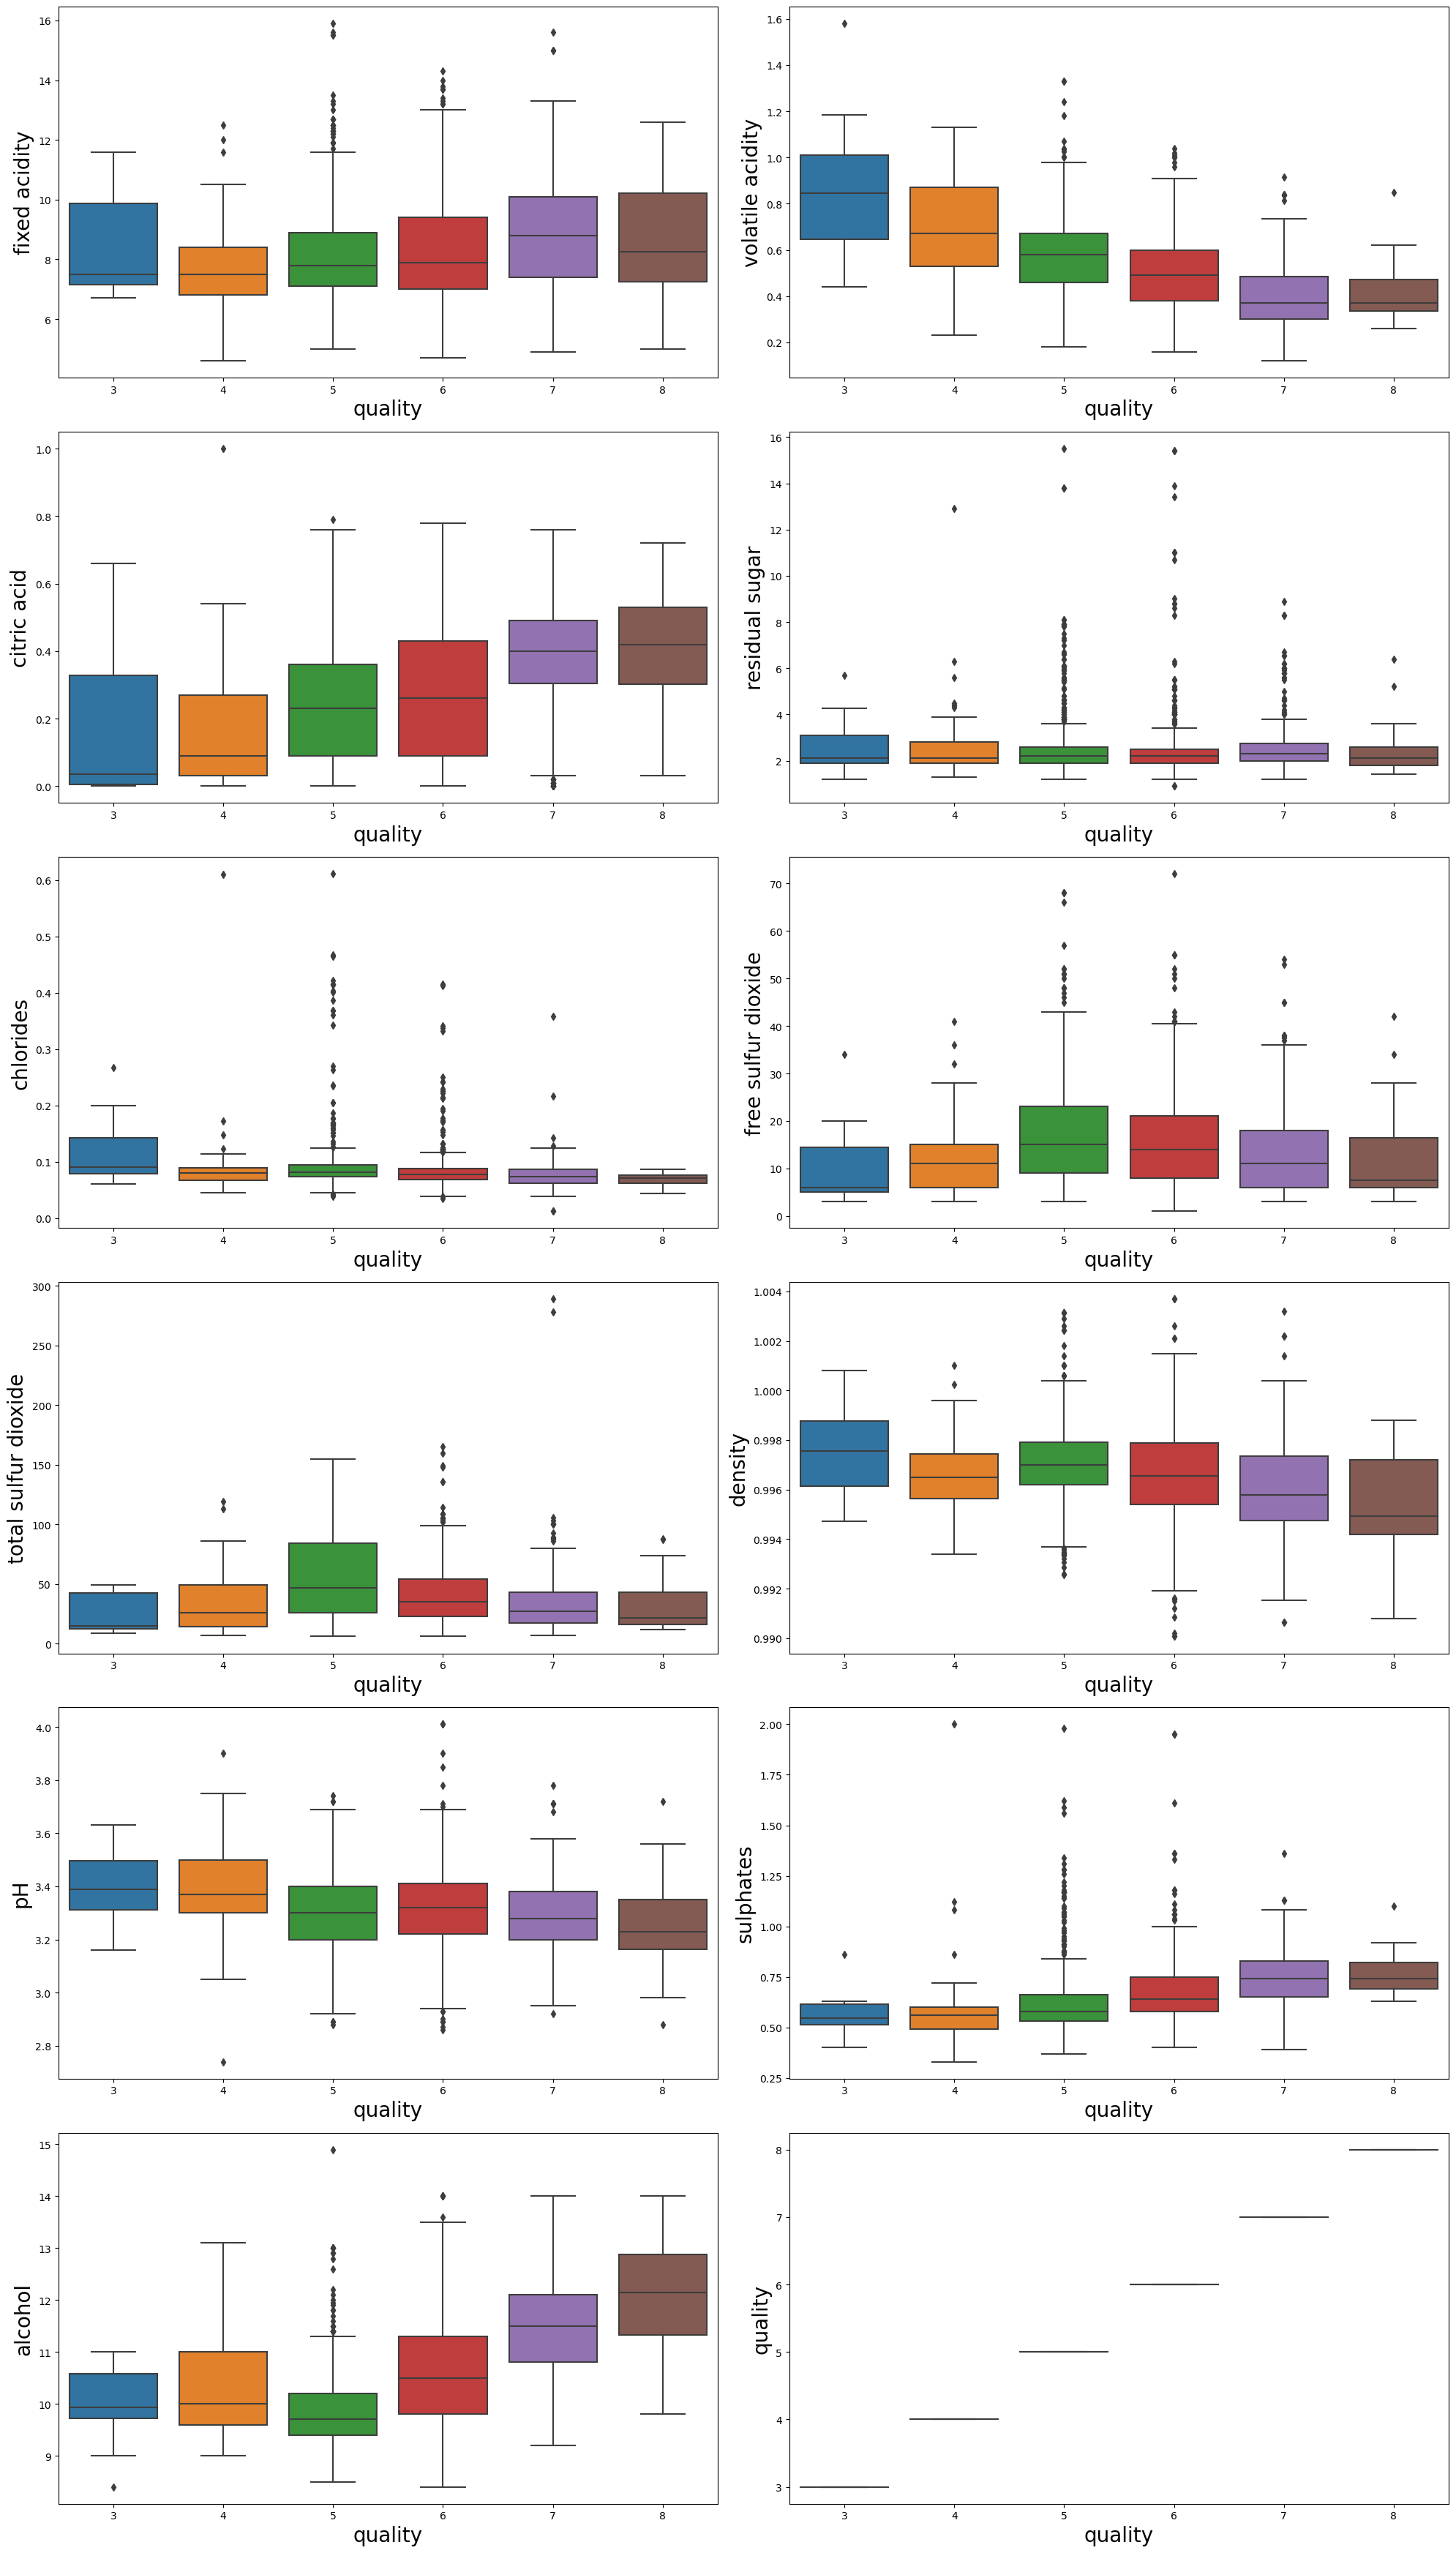

In [19]:
plt.figure(figsize=(20,35), facecolor='white')
plotnumber =1
for column in df:
    if plotnumber <=12:
        ax = plt.subplot(6,2,plotnumber)
        sns.boxplot(x="quality", y=column, data=df) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()


In [20]:
Grp_c=df.groupby('class')
C_1=Grp_c.get_group(1)
C_2=Grp_c.get_group(0)

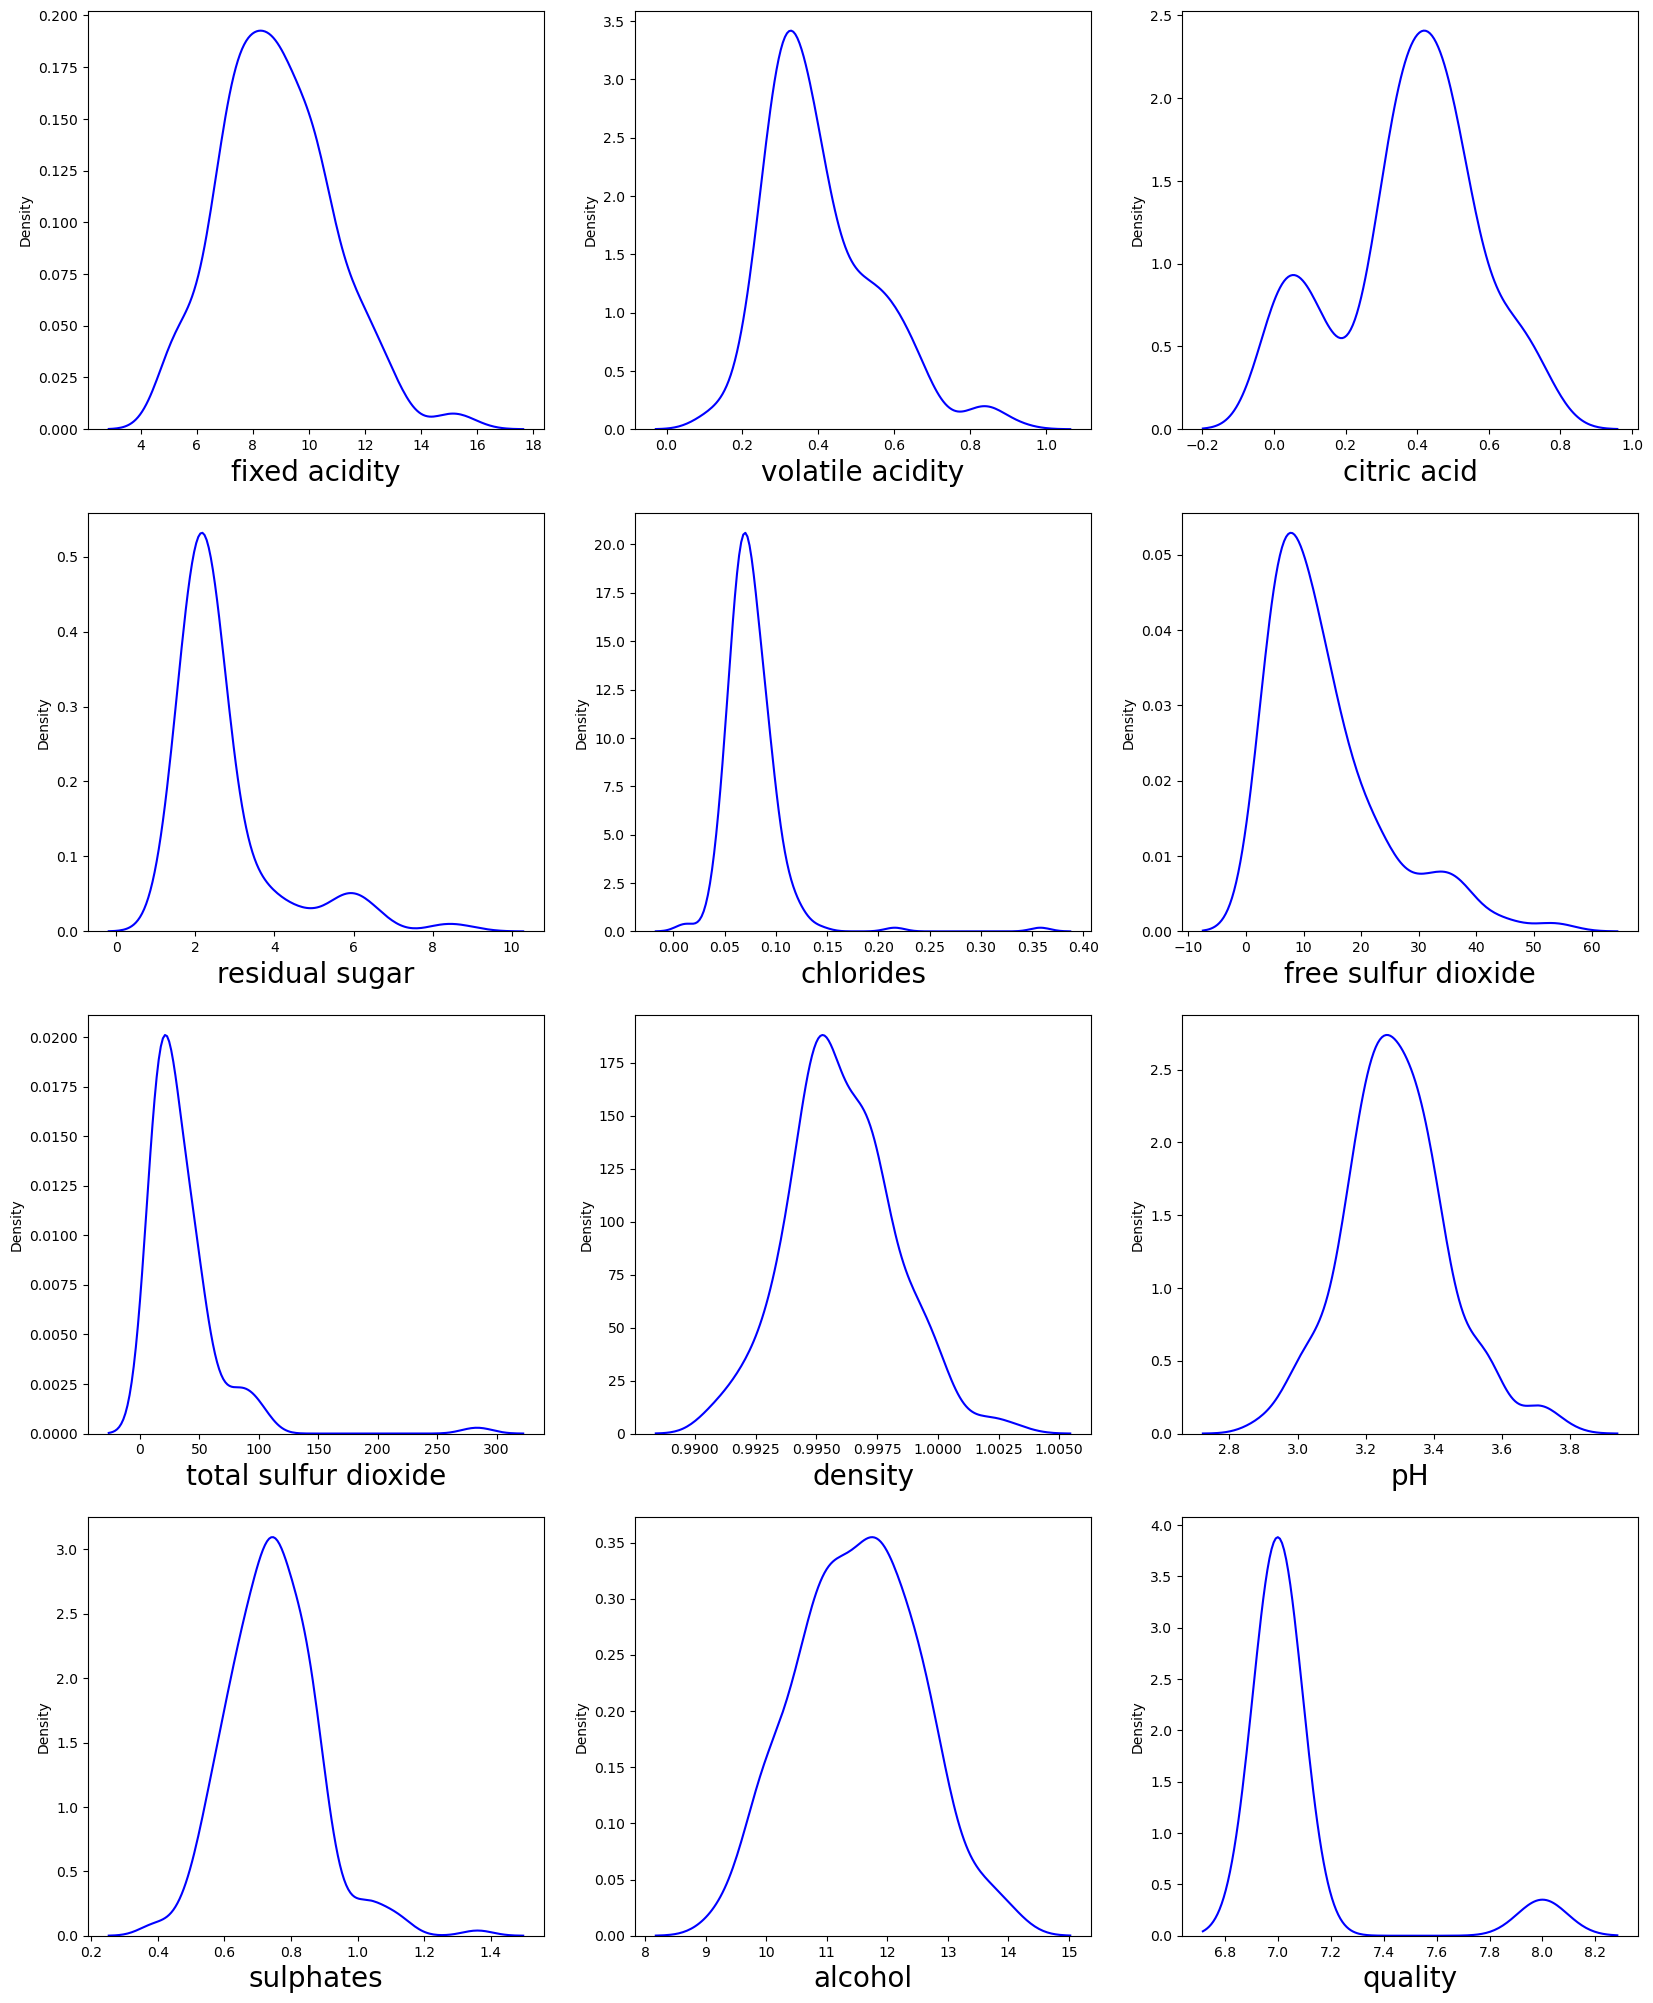

In [21]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber =1
for column in C_1:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.kdeplot(C_1[column], color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

### Outliers Detection basesd on IQR

In [22]:
df2 =df1.copy()
Q1 =df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
class                    0.000000
dtype: float64


In [23]:
df_new =df2[~((df <(Q1 - 1.5*IQR)) | (df >(Q3 + 1.5*IQR))).any(axis=1)]
print(df_new.shape)

(1047, 12)


In [24]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1047)/1599)*100,'%')

Percentage Data Loss : 34.52157598499062 %


### Removing Outliers using Z score Method

In [25]:
from scipy.stats import zscore

In [26]:
df3=df1.copy()
z_score = zscore(df3)
z_score_abs = np.abs(z_score)
df_new= df3[(z_score_abs < 3).all(axis=1)]
df_new.shape

(1458, 12)

In [27]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1458)/1599)*100,'%')

Percentage Data Loss : 8.818011257035648 %


### Skewness detection and transformation

In [28]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
class                   2.103030
dtype: float64

Data is highly skewed. So it need to transform

### Transforming positive or right skew data using boxcox transformation

In [29]:
from scipy.stats import boxcox

In [30]:
# Define a dictionary of columns and lambdas
boxcox_dict = {'fixed acidity': 0, 'residual sugar': -1, 'chlorides': -0.5, 'free sulfur dioxide': 0, 
               'total sulfur dioxide': 0, 'sulphates': 0, 'alcohol': -0.5}

In [31]:
# Loop over the dictionary and apply the transformation
for col, lam in boxcox_dict.items():
    df_new[col] = boxcox(df_new[col], lam)

In [32]:
df_new.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          0.129444
chlorides              -0.174196
free sulfur dioxide    -0.300264
total sulfur dioxide   -0.095735
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.508422
class                   2.103030
dtype: float64

### Corrleation

In [33]:
df_new.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
fixed acidity,1.000000,-0.295813,0.692400,0.216829,0.241177,-0.170132,-0.096951,0.664021,-0.721165,0.190975,-0.037563,0.119643
volatile acidity,-0.295813,1.000000,-0.589286,0.039221,0.080724,0.046278,0.099221,-0.000446,0.252900,-0.356126,-0.212683,-0.268236
citric acid,0.692400,-0.589286,1.000000,0.187498,0.100659,-0.107676,-0.027290,0.372338,-0.521270,0.308570,0.162704,0.226809
residual sugar,0.216829,0.039221,0.187498,1.000000,0.219573,0.034795,0.126538,0.398875,-0.073404,0.063047,0.152463,0.073978
chlorides,0.241177,0.080724,0.100659,0.219573,1.000000,-0.012947,0.095544,0.414090,-0.206719,-0.010645,-0.278623,-0.144047
free sulfur dioxide,-0.170132,0.046278,-0.107676,0.034795,-0.012947,1.000000,0.778888,-0.041086,0.132344,0.045477,-0.090153,-0.095752
total sulfur dioxide,-0.096951,0.099221,-0.027290,0.126538,0.095544,0.778888,1.000000,0.140454,0.032708,0.006369,-0.269103,-0.183569
density,0.664021,-0.000446,0.372338,0.398875,0.414090,-0.041086,0.140454,1.000000,-0.311217,0.133096,-0.462380,-0.154221
pH,-0.721165,0.252900,-0.521270,-0.073404,-0.206719,0.132344,0.032708,-0.311217,1.000000,-0.025521,0.138230,-0.079528
sulphates,0.190975,-0.356126,0.308570,0.063047,-0.010645,0.045477,0.006369,0.133096,-0.025521,1.000000,0.255667,0.312522


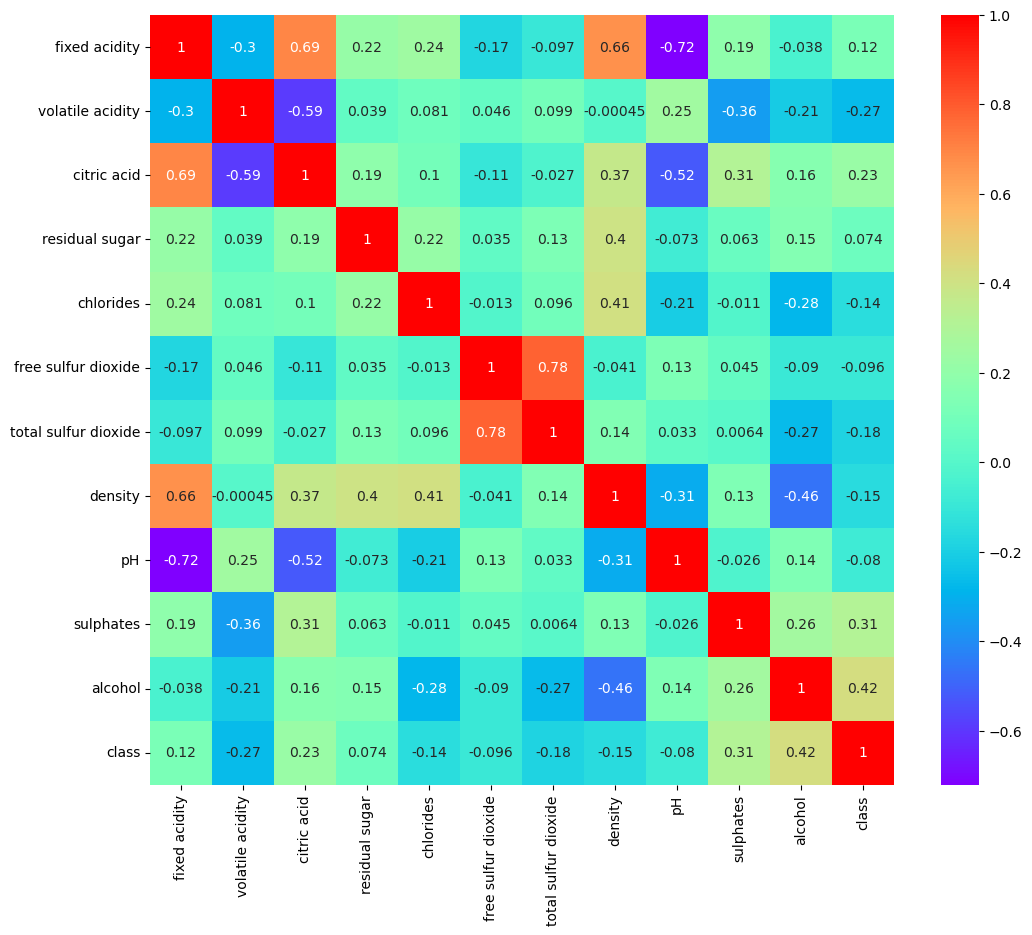

In [34]:
plt.figure(figsize =(12,10))
sns.heatmap(df_new.corr(), annot= True ,cmap='rainbow')
# cmap =PiYG cmap='Spectral'
plt.tight_layout
plt.show()

### Visualizing correlation of feature columns with label column.

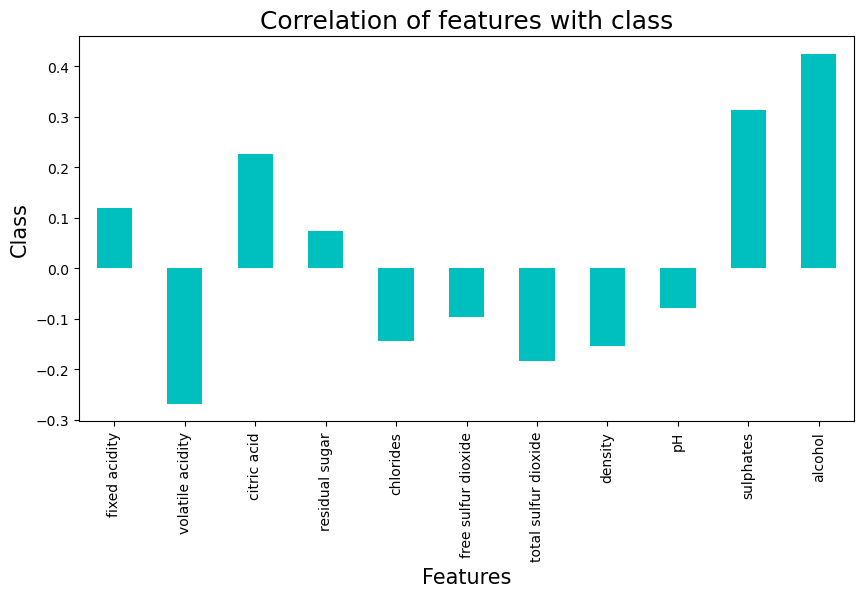

In [35]:
plt.figure(figsize = (10,5))
df_new.corr()['class'].drop(['class']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Class',fontsize=15)
plt.title('Correlation of features with class',fontsize = 18)
plt.show()

### Checking Multicollinearity between features using variance_inflation_factor

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
df_new2=df_new.copy()

In [38]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,438.548030,fixed acidity
1,19.154557,volatile acidity
2,8.924413,citric acid
3,28.228238,residual sugar
4,50.847679,chlorides
5,43.111998,free sulfur dioxide
6,89.150536,total sulfur dioxide
7,5749.315171,density
8,1309.140274,pH
9,8.733061,sulphates


### pH, density are not contributing to label and also high multicollinearity exists. so we will drop density.

In [39]:
df_new2= df_new2.drop(['density','pH'], axis=1)

In [40]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(df_new2.values,i) for i in range(df_new2.shape[1])]
vif['Features']= df_new2.columns
vif

,vif,Features
0,221.761299,fixed acidity
1,19.013857,volatile acidity
2,8.261869,citric acid
3,27.170221,residual sugar
4,50.520413,chlorides
5,41.606170,free sulfur dioxide
6,76.519033,total sulfur dioxide
7,8.227630,sulphates
8,333.721403,alcohol
9,1.452193,class


Still there are lot of multicollinearity. So we need to scale data and apply pca dimensionilty reduction technique.

### Standard Scaling

In [41]:
X= df_new.drop(columns=['class'])
Y= df_new['class']

In [42]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [43]:
X_scale

array([[-0.51360254,  1.0387081 , -1.38741253, ...,  1.37476832,
        -0.60954326, -1.04551382],
       [-0.23702113,  2.10132549, -1.38741253, ..., -0.82375195,
         0.39246697, -0.58517226],
       [-0.23702113,  1.39291389, -1.17821377, ..., -0.3982319 ,
         0.15960713, -0.58517226],
       ...,
       [-1.35910388, -0.0829436 , -0.70751654, ...,  0.73648824,
         0.89812923,  0.64182987],
       [-1.70374108,  0.71401945, -0.75981623, ...,  1.80028837,
         0.6152721 , -0.15218234],
       [-1.61543928, -1.26362959,  1.07067297, ...,  0.52372821,
         0.23840028,  0.64182987]])

### Principal Component Analysis(PCA)

In [44]:
from sklearn.decomposition import PCA

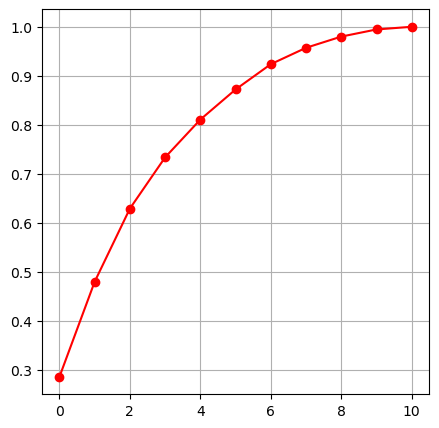

In [45]:
pca = PCA()

#plot the graph to find the principal components

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(5,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 8 principal components attribute for 90% of variation in the data. 

We shall pick the first 8 components for our prediction

In [46]:
pca_new = PCA(n_components=8)
x_new = pca_new.fit_transform(X_scale)
print(x_new)

[[ 1.68650741e+00 -1.13427713e+00  1.20466448e+00 ... -8.36247920e-01
  -2.80279751e-01 -4.99499195e-01]
 [ 6.94317615e-01 -2.37831525e+00  1.67711310e-01 ...  2.59097937e-01
   1.86103085e+00  8.57316030e-01]
 [ 6.25870099e-01 -1.60320594e+00  5.11187315e-01 ...  1.11415879e-01
   1.10007379e+00  5.67815471e-01]
 ...
 [ 1.52905689e+00 -8.18231397e-03 -1.51777109e+00 ...  2.95236388e-01
   1.74538537e-01  3.66013706e-01]
 [ 2.60038294e+00 -6.48382815e-01 -1.18250554e+00 ... -3.77583301e-02
  -1.31893672e-03 -2.86682942e-01]
 [ 4.02630212e-01  7.89189967e-01 -1.87281620e+00 ...  1.93469807e-01
  -1.56509536e+00  7.27199628e-01]]


### Machine Learning Model Building

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [48]:
# Use the random_state parameter to set a fixed seed for the random number generator

X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=42, test_size=.3, stratify=Y)

### Finding best Random state

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(x_new,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9246575342465754 on Random_state 133


### Logistics Regression

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(x_new, Y, random_state=133, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9128630705394191


Confusion matrix of Logistics Regression : 
 [[420  10]
 [ 32  20]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       430
           1       0.67      0.38      0.49        52

    accuracy                           0.91       482
   macro avg       0.80      0.68      0.72       482
weighted avg       0.90      0.91      0.90       482



### Finding Optimal value of n_neighbors for KNN

In [51]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34986660172721457
RMSE value for k=  2 is: 0.3089266654843879
RMSE value for k=  3 is: 0.3408556477661884
RMSE value for k=  4 is: 0.32207831320041547
RMSE value for k=  5 is: 0.33159991891444485
RMSE value for k=  6 is: 0.31884126307199384
RMSE value for k=  7 is: 0.32528315147069237
RMSE value for k=  8 is: 0.31884126307199384
RMSE value for k=  9 is: 0.31226651028245633
RMSE value for k=  10 is: 0.302136239226515
RMSE value for k=  11 is: 0.31226651028245633
RMSE value for k=  12 is: 0.29868314022934306
RMSE value for k=  13 is: 0.3089266654843879
RMSE value for k=  14 is: 0.29868314022934306
RMSE value for k=  15 is: 0.31226651028245633
RMSE value for k=  16 is: 0.302136239226515
RMSE value for k=  17 is: 0.31226651028245633
RMSE value for k=  18 is: 0.32207831320041547
RMSE value for k=  19 is: 0.32528315147069237
RMSE value for k=  20 is: 0.3155710098229302


<Axes: >

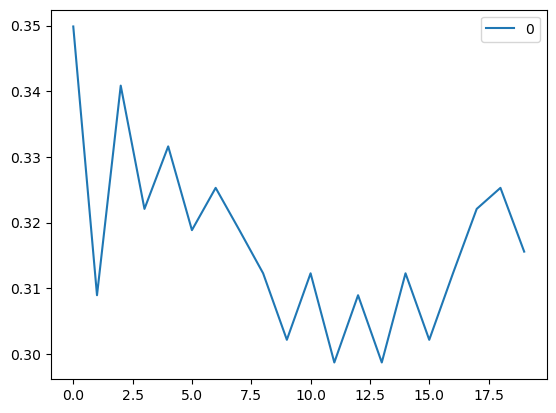

In [52]:
# plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

At k= 12, the RMSE is approximately 0.29868314022934306, and shoots up on further increasing the k value. 
We can safely say that k=12 will give us the best result in this case

In [53]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.9128630705394191


Confusion matrix : 
 [[419  11]
 [ 31  21]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.66      0.40      0.50        52

    accuracy                           0.91       482
   macro avg       0.79      0.69      0.73       482
weighted avg       0.90      0.91      0.90       482



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.9087136929460581


Confusion matrix : 
 [[417  13]
 [ 31  21]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       430
           1       0.62      0.40      0.49        52

    accuracy                           0.91       482
   macro avg       0.77      0.69      0.72       482
weighted avg       0.90      0.91      0.90       482




We can see that RandomForestClassifier() gives maximum Accuracy so we will continue further investigation 
with crossvalidation of above model

### CrossValidation :

In [54]:
from sklearn.model_selection import cross_val_score
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score SVC() :

Score : [0.8630137  0.8630137  0.85958904 0.86254296 0.86254296]
Mean Score : 0.8621404698018171
Std deviation : 0.0012929682756927664




Cross Validation Score GaussianNB() :

Score : [0.89383562 0.75342466 0.8869863  0.74226804 0.87972509]
Mean Score : 0.8312479404980465
Std deviation : 0.06833432742537314




Cross Validation Score DecisionTreeClassifier() :

Score : [0.8630137  0.81506849 0.85958904 0.79725086 0.80756014]
Mean Score : 0.8284964458880572
Std deviation : 0.027397502924085503




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.86643836 0.79109589 0.85616438 0.85910653 0.84879725]
Mean Score : 0.844320482041143
Std deviation : 0.027206632143933835




Cross Validation Score RandomForestClassifier() :

Score : [0.88013699 0.86986301 0.8869863  0.85223368 0.87285223]
Mean Score : 0.8724144424045569
Std deviation : 0.011712740933421737




Cross Validation Score AdaBoostClassifier() :

Score : [0.88013699 0.8424

we can see that Random Forest Classifier gives maximum Accuracy. So we will apply Hyperparameter tuning on Random Forest model

### Hyper Parameter Tuning : GridSearchCV

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [57]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [58]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'n_estimators': 50}

### Final Model

In [59]:
Final_mod = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='sqrt')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.921161825726141


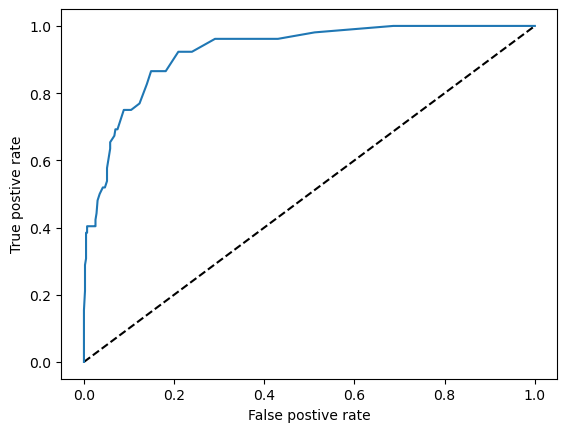

Auc Score :
 0.693783542039356


In [60]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### Saving model

In [61]:
import joblib
joblib.dump(Final_mod,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']